#**TP1 - Time series**


---

Manel Lounissi - Sandeep Nirmal


Installer dépendances

In [ ]:
!pip install statsmodels
!pip install matplotlib pandas


**1. Importer le dataset AirPassengers.**

In [ ]:
import pandas as pd

import statsmodels.api as sm
data = sm.datasets.get_rdataset("AirPassengers").data


In [ ]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url)
print("5 premières lignes :")
print(df.head())


5 premières lignes :
     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


**2. Afficher les 5 premières lignes.**

In [ ]:
df.head()


,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


**3. Convertir la colonne date en index temporel (pd.to_datetime).**

In [ ]:
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**4. Visualiser la série.**

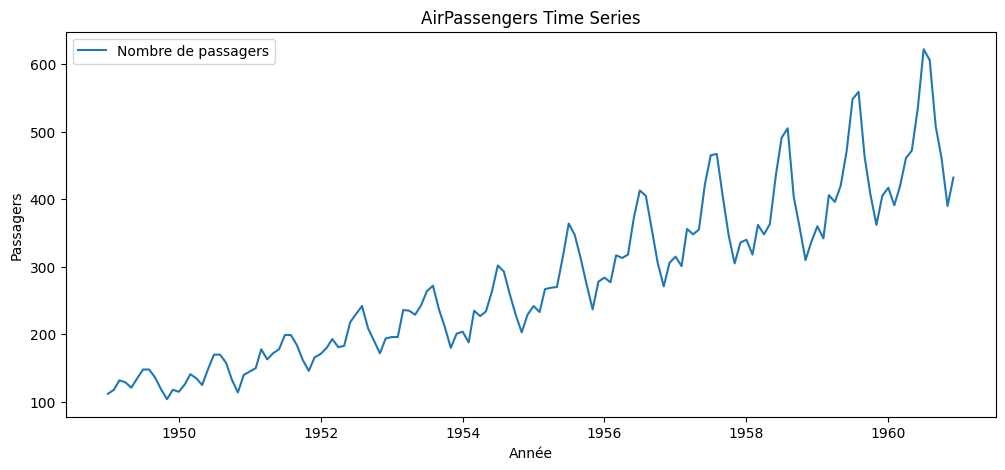

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label="Nombre de passagers")
plt.title("AirPassengers Time Series")
plt.xlabel("Année")
plt.ylabel("Passagers")
plt.legend()
plt.show()


**5. Calculer et tracer une moyenne mobile (fenêtre 12 mois).**

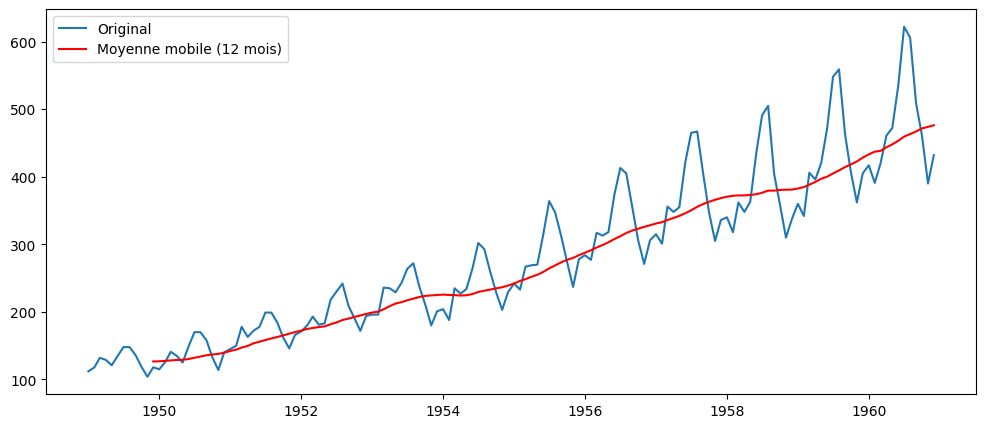

In [ ]:
df['MA12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,5))
plt.plot(df['Passengers'], label="Original")
plt.plot(df['MA12'], color="red", label="Moyenne mobile (12 mois)")
plt.legend()
plt.show()


**6. Décomposer la série (tendance + saisonnalité + résidus) avec statsmodels.**

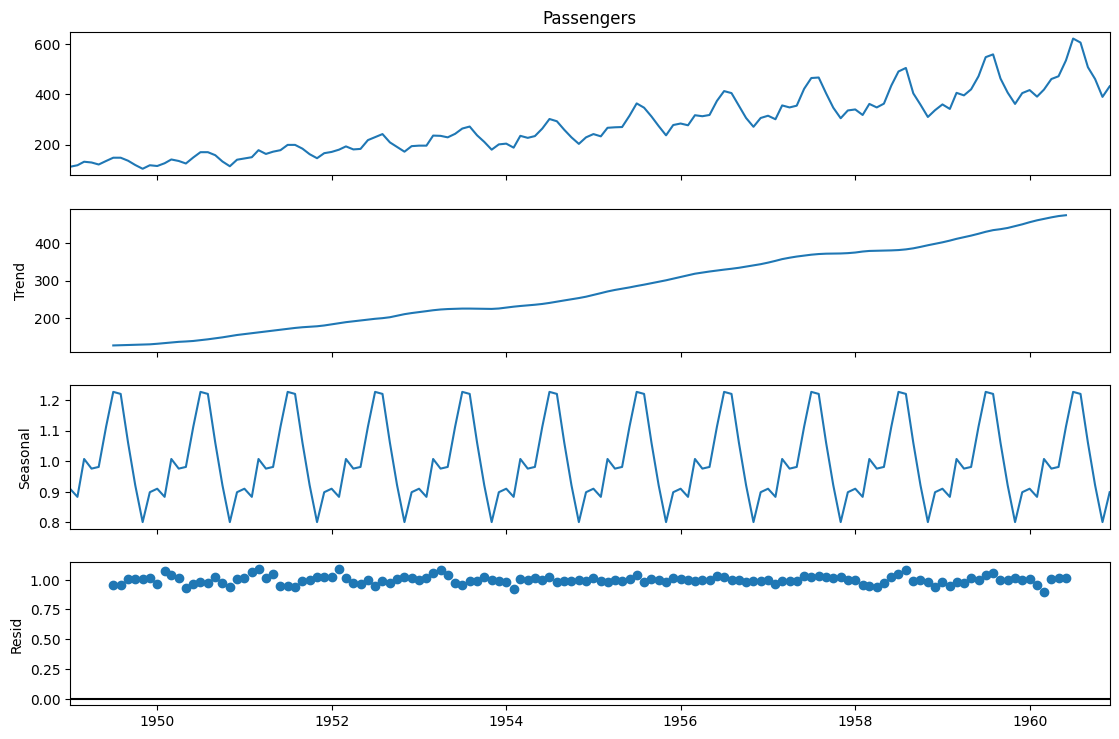

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()
